# AGREGACIÓN DE DATOS POR CATEGORÍA

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ['Male', 'Female']
economic_status = ['Poor', 'Middle Class', 'Rich']

In [3]:
n = 500

gender_data = []
economic_status_data = []

for i in range(0,n):
  gender_data.append(np.random.choice(gender))
  economic_status_data.append(np.random.choice(economic_status))

In [4]:
gender_data[1:10]

['Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male']

In [5]:
economic_status_data[1:10]

['Middle Class',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Poor',
 'Rich',
 'Middle Class',
 'Rich',
 'Poor']

In [6]:
# N(m,s) = m + s * N(0,1)
height_data = 160 + 30 * np.random.randn(n)
weight_data = 65 + 25 * np.random.randn(n)
age_data = 30 + 12 * np.random.randn(n)
income_data = 18000 + 3500 * np.random.randn(n)

In [7]:
data = pd.DataFrame(
    {
        'Gender': gender_data,
        'Economic Status': economic_status_data,
        'Height': height_data,
        'Weight': weight_data,
        'Age': age_data,
        'Income': income_data      
    }
)
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,96.287353,22.658103,27.365588,19110.786517
1,Male,Middle Class,156.328849,131.648455,17.114096,15186.345231
2,Female,Middle Class,136.215177,58.635931,14.993129,16988.139368
3,Female,Middle Class,172.150482,43.687106,40.064650,24565.251684
4,Female,Rich,166.014218,63.488704,4.851548,14640.856364


In [8]:
data['Age'] = [int(x) for x in data['Age']] #transformamos edad a entero
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,96.287353,22.658103,27,19110.786517
1,Male,Middle Class,156.328849,131.648455,17,15186.345231
2,Female,Middle Class,136.215177,58.635931,14,16988.139368
3,Female,Middle Class,172.150482,43.687106,40,24565.251684
4,Female,Rich,166.014218,63.488704,4,14640.856364


# AGRUPACIÓN DE DATOS

In [9]:
grouped_gender = data.groupby('Gender')

In [10]:
grouped_gender.groups

{'Female': Int64Index([  2,   3,   4,   7,   8,  11,  12,  16,  17,  19,
             ...
             476, 477, 479, 480, 481, 484, 486, 492, 493, 495],
            dtype='int64', length=259),
 'Male': Int64Index([  0,   1,   5,   6,   9,  10,  13,  14,  15,  18,
             ...
             487, 488, 489, 490, 491, 494, 496, 497, 498, 499],
            dtype='int64', length=241)}

In [11]:
grouped_gender.groups['Female']

Int64Index([  2,   3,   4,   7,   8,  11,  12,  16,  17,  19,
            ...
            476, 477, 479, 480, 481, 484, 486, 492, 493, 495],
           dtype='int64', length=259)

In [12]:
grouped_gender.groups['Female'].values

array([  2,   3,   4,   7,   8,  11,  12,  16,  17,  19,  20,  26,  27,
        28,  29,  30,  31,  33,  34,  37,  39,  40,  42,  43,  44,  46,
        49,  50,  51,  53,  54,  58,  59,  61,  62,  67,  69,  70,  71,
        73,  75,  77,  78,  80,  82,  85,  86,  87,  88,  89,  90,  94,
        95,  98,  99, 103, 104, 105, 106, 107, 108, 109, 110, 113, 117,
       120, 121, 123, 125, 126, 128, 129, 131, 133, 137, 139, 140, 141,
       142, 145, 146, 148, 149, 152, 154, 160, 161, 163, 164, 165, 166,
       168, 170, 171, 173, 174, 175, 177, 178, 179, 180, 182, 185, 186,
       188, 189, 191, 193, 196, 197, 200, 201, 202, 204, 210, 216, 217,
       219, 220, 222, 223, 224, 229, 230, 231, 234, 235, 241, 244, 247,
       249, 250, 254, 255, 257, 258, 260, 263, 266, 269, 270, 271, 272,
       273, 274, 277, 280, 282, 286, 289, 290, 294, 297, 300, 304, 305,
       306, 307, 308, 309, 312, 313, 314, 316, 317, 319, 320, 321, 323,
       326, 327, 328, 329, 330, 332, 333, 334, 337, 339, 340, 34

In [13]:
for names, groups in grouped_gender:
  print(names)
  print(groups)

Female
     Gender Economic Status      Height      Weight  Age        Income
2    Female    Middle Class  136.215177   58.635931   14  16988.139368
3    Female    Middle Class  172.150482   43.687106   40  24565.251684
4    Female            Rich  166.014218   63.488704    4  14640.856364
7    Female    Middle Class  213.806293   77.741386   23  20882.282136
8    Female            Rich  202.789926   65.784304   12  17309.021042
..      ...             ...         ...         ...  ...           ...
484  Female            Rich  185.659588   51.728092    7  16400.461194
486  Female    Middle Class  126.977133   85.485338   36  20178.772102
492  Female            Poor  158.647618   95.412382   32  24871.240970
493  Female            Poor  179.542218  118.491672   22  12613.921181
495  Female    Middle Class  165.387812   57.467913   23  15952.575802

[259 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  Age        Income
0     Male    Middle Class   96.287353   2

In [14]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
2,Female,Middle Class,136.215177,58.635931,14,16988.139368
3,Female,Middle Class,172.150482,43.687106,40,24565.251684
4,Female,Rich,166.014218,63.488704,4,14640.856364
7,Female,Middle Class,213.806293,77.741386,23,20882.282136
8,Female,Rich,202.789926,65.784304,12,17309.021042
...,...,...,...,...,...,...
484,Female,Rich,185.659588,51.728092,7,16400.461194
486,Female,Middle Class,126.977133,85.485338,36,20178.772102
492,Female,Poor,158.647618,95.412382,32,24871.240970
493,Female,Poor,179.542218,118.491672,22,12613.921181


In [15]:
data.groupby('Economic Status').get_group('Poor')

,Gender,Economic Status,Height,Weight,Age,Income
5,Male,Poor,189.165627,35.330616,52,19832.451668
9,Male,Poor,152.124758,93.055337,24,16701.243486
13,Male,Poor,195.571319,46.759877,41,19291.169618
20,Female,Poor,162.619176,26.770603,36,15666.899703
21,Male,Poor,172.594072,64.079182,24,17798.752757
...,...,...,...,...,...,...
493,Female,Poor,179.542218,118.491672,22,12613.921181
496,Male,Poor,132.939004,40.201862,21,10989.838114
497,Male,Poor,137.382540,82.358226,31,20797.262204
498,Male,Poor,165.529279,89.537724,12,22992.088200


In [16]:
double_group = data.groupby(['Gender', 'Economic Status'])

In [17]:
len(double_group)

6

In [18]:
for names, groups in double_group:
  print(names)
  print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight  Age        Income
2    Female    Middle Class  136.215177  58.635931   14  16988.139368
3    Female    Middle Class  172.150482  43.687106   40  24565.251684
7    Female    Middle Class  213.806293  77.741386   23  20882.282136
27   Female    Middle Class  189.182419  59.323782   37  15040.321924
29   Female    Middle Class  143.574537  85.267779   42  11415.373872
..      ...             ...         ...        ...  ...           ...
474  Female    Middle Class  149.837036  89.460812   37  14435.384066
477  Female    Middle Class  143.461293  49.541551   17  14500.747821
480  Female    Middle Class  170.847580  79.224562   10  20381.029913
486  Female    Middle Class  126.977133  85.485338   36  20178.772102
495  Female    Middle Class  165.387812  57.467913   23  15952.575802

[78 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height      Weight  Age        Income
20   Female         

In [19]:
double_group.get_group(('Male', 'Rich'))

,Gender,Economic Status,Height,Weight,Age,Income
6,Male,Rich,158.390675,73.843834,24,12732.781971
10,Male,Rich,157.672750,49.419701,25,19675.310777
15,Male,Rich,150.849987,73.994554,48,16641.685309
18,Male,Rich,142.043610,108.933487,32,19320.948623
22,Male,Rich,183.076562,90.418238,51,23029.845249
...,...,...,...,...,...,...
467,Male,Rich,169.430890,59.797041,20,13815.655596
478,Male,Rich,181.972908,59.596707,26,20660.964105
487,Male,Rich,151.938162,80.436287,27,14418.529323
490,Male,Rich,173.124652,66.881780,17,18340.509484


## OPERACIONES SOBRE DATOS AGRUPADOS

In [20]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     12898.029394  5274.000009  2368  1.382836e+06
       Poor             15924.204935  6362.056245  3098  1.889638e+06
       Rich             12546.171090  4974.391734  2223  1.379992e+06
Male   Middle Class     13046.018376  5268.062790  2230  1.523266e+06
       Poor             11952.151457  5076.204634  2385  1.359266e+06
       Rich             13390.562105  5337.002509  2449  1.467423e+06

In [21]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     165.359351  67.615385  30.358974  17728.661878
       Poor             156.119656  62.373100  30.372549  18525.863419
       Rich             158.812292  62.966984  28.139241  17468.247329
Male   Middle Class     157.180944  63.470636  26.867470  18352.604685
       Poor             159.362019  67.682728  31.800000  18123.548137
       Rich             161.332074  64.301235  29.506024  17679.800785

In [22]:
double_group.size()

Gender  Economic Status
Female  Middle Class        78
        Poor               102
        Rich                79
Male    Middle Class        83
        Poor                75
        Rich                83
dtype: int64

In [23]:
double_group.describe()

Height              ...        Income              
                        count        mean  ...           75%           max
Gender Economic Status                     ...                            
Female Middle Class      78.0  165.359351  ...  20376.076612  25953.903688
       Poor             102.0  156.119656  ...  21044.911729  25766.037536
       Rich              79.0  158.812292  ...  20401.428016  24366.732839
Male   Middle Class      83.0  157.180944  ...  20801.272057  25931.077333
       Poor              75.0  159.362019  ...  20494.066358  30444.173827
       Rich              83.0  161.332074  ...  20289.971144  26665.394511

[6 rows x 32 columns]

In [24]:
grouped_income = double_group['Income']
grouped_income.describe()

count          mean  ...           75%           max
Gender Economic Status                       ...                            
Female Middle Class      78.0  17728.661878  ...  20376.076612  25953.903688
       Poor             102.0  18525.863419  ...  21044.911729  25766.037536
       Rich              79.0  17468.247329  ...  20401.428016  24366.732839
Male   Middle Class      83.0  18352.604685  ...  20801.272057  25931.077333
       Poor              75.0  18123.548137  ...  20494.066358  30444.173827
       Rich              83.0  17679.800785  ...  20289.971144  26665.394511

[6 rows x 8 columns]

In [25]:
# con agregate se puede hacer un describe todo lo personalizado que queramos
double_group.aggregate(
    {
        'Income': np.sum,
        'Age': np.mean,
        'Height': np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.382836e+06  30.358974  32.134619
       Poor             1.889638e+06  30.372549  30.546778
       Rich             1.379992e+06  28.139241  27.688077
Male   Middle Class     1.523266e+06  26.867470  28.654583
       Poor             1.359266e+06  31.800000  26.168478
       Rich             1.467423e+06  29.506024  29.752087

In [26]:
# En lugar de aplicar unas funciones ya existentes, podemos aplicar alguna personalizada que hayamos definido
# podemos hacerlo con una función lambda si solo vamos a hacerlo una vez
double_group.aggregate(
    {
        'Age': np.mean,
        'Height': lambda h: np.mean(h) / np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.358974  5.179139
       Poor             30.372549  5.136078
       Rich             28.139241  5.772415
Male   Middle Class     26.867470  5.518714
       Poor             31.800000  6.130856
       Rich             29.506024  5.455511

In [27]:
double_group.aggregate([np.sum, np.mean, np.std])

Height              ...        Income             
                                 sum        mean  ...          mean          std
Gender Economic Status                            ...                           
Female Middle Class     12898.029394  165.359351  ...  17728.661878  3560.337235
       Poor             15924.204935  156.119656  ...  18525.863419  3496.234980
       Rich             12546.171090  158.812292  ...  17468.247329  3284.290063
Male   Middle Class     13046.018376  157.180944  ...  18352.604685  3148.639726
       Poor             11952.151457  159.362019  ...  18123.548137  3923.118487
       Rich             13390.562105  161.332074  ...  17679.800785  3855.501136

[6 rows x 12 columns]

In [28]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.179139  2.689326  2.451509  5.011720
       Poor             5.136078  2.568821  2.459905  5.324971
       Rich             5.772415  2.903206  2.175134  5.352714
Male   Middle Class     5.518714  2.640845  2.304730  5.864174
       Poor             6.130856  3.009757  2.529019  4.650788
       Rich             5.455511  2.683377  2.580595  4.613480

# FILTRADO DE DATOS

In [29]:
double_group['Age'].filter(lambda x: x.sum()> 2400)

6      24
10     25
15     48
18     32
20     36
       ..
487    27
490    17
492    32
493    22
494    15
Name: Age, Length: 185, dtype: int64

#TRANSFORMACIÓN DE VARIABLES

In [30]:
zscore = lambda x: (x - x.mean()) / x.std() #tipificación a N(0,1)

In [31]:
z_group = double_group.transform(zscore)
z_group

,Height,Weight,Age,Income
0,-2.125091,-1.687841,0.011300,0.240797
1,-0.029737,2.819558,-0.841331,-1.005596
2,-0.906940,-0.354851,-1.312503,-0.207992
3,0.211334,-0.945600,0.773513,1.920208
4,0.260109,0.023902,-1.854091,-0.860883
...,...,...,...,...
495,0.000886,-0.401009,-0.590421,-0.498853
496,-1.009727,-1.213862,-0.853167,-1.818377
497,-0.839922,0.648234,-0.063198,0.681528
498,0.235675,0.965360,-1.564139,1.240987


(array([  1.,   0.,   6.,  59., 103., 158.,  92.,  62.,  16.,   3.]),
 array([-4.04037124, -3.31696434, -2.59355743, -1.87015053, -1.14674363,
        -0.42333672,  0.30007018,  1.02347708,  1.74688399,  2.47029089,
         3.19369779]),
 <a list of 10 Patch objects>)

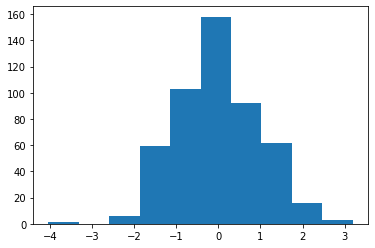

In [32]:
import matplotlib.pyplot as plt
plt.hist(z_group['Age'])

In [33]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [34]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,96.287353,22.658103,27,19110.786517
1,156.328849,131.648455,17,15186.345231
2,136.215177,58.635931,14,16988.139368
3,172.150482,43.687106,40,24565.251684
4,166.014218,63.488704,4,14640.856364
...,...,...,...,...
495,165.387812,57.467913,23,15952.575802
496,132.939004,40.201862,21,10989.838114
497,137.382540,82.358226,31,20797.262204
498,165.529279,89.537724,12,22992.088200


#OPERACIONES DIVERSAS MUY ÚTILES

In [35]:
# seleccionar la fila i-ésima
double_group.head(1) #ojo que al ser una agrupación, devuelve la primera fila de cada uno

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,96.287353,22.658103,27,19110.786517
2,Female,Middle Class,136.215177,58.635931,14,16988.139368
4,Female,Rich,166.014218,63.488704,4,14640.856364
5,Male,Poor,189.165627,35.330616,52,19832.451668
6,Male,Rich,158.390675,73.843834,24,12732.781971
20,Female,Poor,162.619176,26.770603,36,15666.899703


In [36]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
484,Female,Rich,185.659588,51.728092,7,16400.461194
491,Male,Middle Class,127.915966,40.308766,29,22487.909439
493,Female,Poor,179.542218,118.491672,22,12613.921181
494,Male,Rich,185.507707,46.383847,15,20264.749497
495,Female,Middle Class,165.387812,57.467913,23,15952.575802
499,Male,Poor,169.787212,99.746994,-1,16463.612835


In [37]:
double_group.nth(32) #el elemento 32

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     148.501797  77.382462   31  18151.414202
       Poor              96.487540  94.162408   45  15102.435156
       Rich             181.021231  57.095438   20  11383.132910
Male   Middle Class     131.264279  20.352768   41  15649.503511
       Poor             178.203174  79.603629   27  21239.532947
       Rich             127.171873  49.442137   48  17694.301287

In [38]:
double_group.nth(82) #si en algunos grupos no hay tantos registros...

Height     Weight  Age        Income
Gender Economic Status                                          
Female Poor             163.842603  75.213636   26  17926.173319
Male   Middle Class     127.915966  40.308766   29  22487.909439
       Rich             185.507707  46.383847   15  20264.749497

In [39]:
data_sorted = data.sort_values(['Age', 'Income'])
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
180,Female,Middle Class,224.350025,69.694269,-20,21278.065168
44,Female,Rich,153.399502,62.117720,-2,16413.844484
499,Male,Poor,169.787212,99.746994,-1,16463.612835
403,Male,Middle Class,131.650128,55.366464,2,17788.916449
202,Female,Rich,126.366959,72.374861,2,20984.717535


In [40]:
age_grouped = data_sorted.groupby('Gender')
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
180,Female,Middle Class,224.350025,69.694269,-20,21278.065168
499,Male,Poor,169.787212,99.746994,-1,16463.612835


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
215,Male,Poor,141.161456,58.153191,61,20690.625298
327,Female,Poor,127.190867,79.566285,70,22002.374626


In [42]:
#from sklearn.model_selection import train_test_split en lugar de from sklearn.cross_validation import train_test_split

# es necesario usar .astype(int) al representar el vector de variables booleanas 

# CONJUNTO DE ENTRENAMIENTO Y CONJUNTO DE TESTING

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/customer-churn-model/Customer%20Churn%20Model.txt'
data = pd.read_csv(url)

len(data)

3333

## Dividir usando la distribución normal

(array([  1.,  21., 116., 402., 858., 965., 646., 252.,  66.,   6.]),
 array([-3.96812422, -3.215912  , -2.46369977, -1.71148755, -0.95927532,
        -0.2070631 ,  0.54514913,  1.29736135,  2.04957358,  2.8017858 ,
         3.55399803]),
 <a list of 10 Patch objects>)

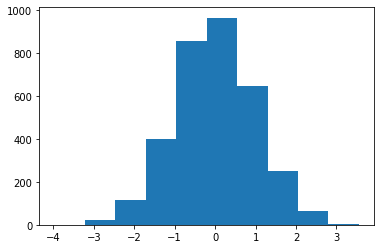

In [44]:
a = np.random.randn(len(data))
plt.hist(a)

In [45]:
check = (a < 0.80) # configura un array con True si se cumple la condición
print(check.sum() / len(a)) # comprobamos que es el 80% de los datos


0.7887788778877888


In [46]:
training = data[check] #en training los del True (80%)
testing = data[~check] #en Testing los del False (20%)
print(len(testing) / len(data))
print(len(training) / len(data))

0.21122112211221122
0.7887788778877888


## Con la librería sklearn

In [47]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)
len(train) / len(data)

0.7998799879987999

## Usando una función de shuffle

In [49]:
import numpy as np
import sklearn

data = sklearn.utils.shuffle(data)

cut_id = int(0.80 * len(data))

train_data = data[:cut_id]
test_data = data[(cut_id+1):]